In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
ev_fiyat = pd.read_csv('./datasets/ev_fiyatlari.csv')
ev_fiyat.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
ev_fiyat_nulls = ev_fiyat.isnull().sum().to_frame('nulls')
ev_fiyat_nulls[ev_fiyat_nulls["nulls"]> 0]

,nulls
LotFrontage,259
Alley,1369
MasVnrType,8
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


**Null Kayıtların Temizlenmesi:**

In [4]:
# Basement parameters
ev_fiyat.BsmtQual.fillna("NA", inplace = True)
ev_fiyat.BsmtCond.fillna("NA", inplace = True)
ev_fiyat.BsmtExposure.fillna("NA", inplace = True)
ev_fiyat.BsmtFinType1.fillna("NA", inplace = True)
ev_fiyat.BsmtFinType2.fillna("NA", inplace = True)

# Garage Parameters
ev_fiyat.GarageType.fillna("NA", inplace = True)
ev_fiyat.GarageYrBlt.fillna("NA", inplace = True)
ev_fiyat.GarageFinish.fillna("NA", inplace = True)
ev_fiyat.GarageQual.fillna("NA", inplace = True)
ev_fiyat.GarageCond.fillna("NA", inplace = True)


#LotFrontage Parameter
ev_fiyat.LotFrontage.fillna(ev_fiyat.LotFrontage.mean(), inplace = True)

#Alley Parameter
ev_fiyat.Alley.fillna("NA", inplace = True)

#MasVnrType Parameter
ev_fiyat.MasVnrType.fillna("None", inplace = True)

#MasVnrArea Parameter
ev_fiyat.MasVnrArea.fillna(0.0, inplace = True)

#Electrical Parameter
ev_fiyat.Electrical.fillna(ev_fiyat.Electrical.value_counts().index[0], inplace = True) 

#FireplaceQu Parameter
ev_fiyat.FireplaceQu.fillna("NA", inplace = True)

#PoolQC Parameter
ev_fiyat.PoolQC.fillna("NA", inplace = True)

#Fence
ev_fiyat.Fence.fillna("NA", inplace = True)

#MiscFeature
ev_fiyat.MiscFeature.fillna("NA", inplace = True)

**Ev Fiyatlarının Dağılımı:**

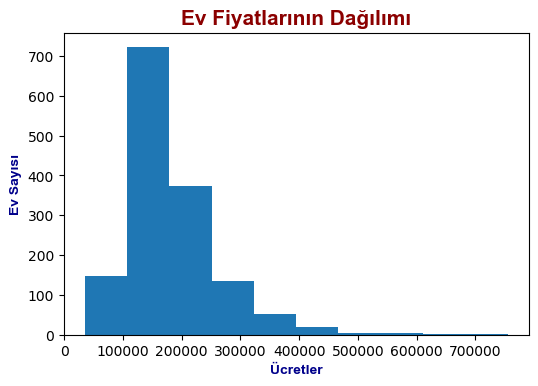

In [5]:
baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(figsize=(6,4), dpi = 100)

plt.hist(ev_fiyat.SalePrice)
plt.title("Ev Fiyatlarının Dağılımı", fontdict = baslik_font)
plt.xlabel("Ücretler", fontdict=eksen_font)
plt.ylabel("Ev Sayısı", fontdict=eksen_font)
plt.show()

**Parametre Fiyat Endeksi Karşılaştırması:**

TypeError: the dtypes of parameters x (object) and width (float64) are incompatible

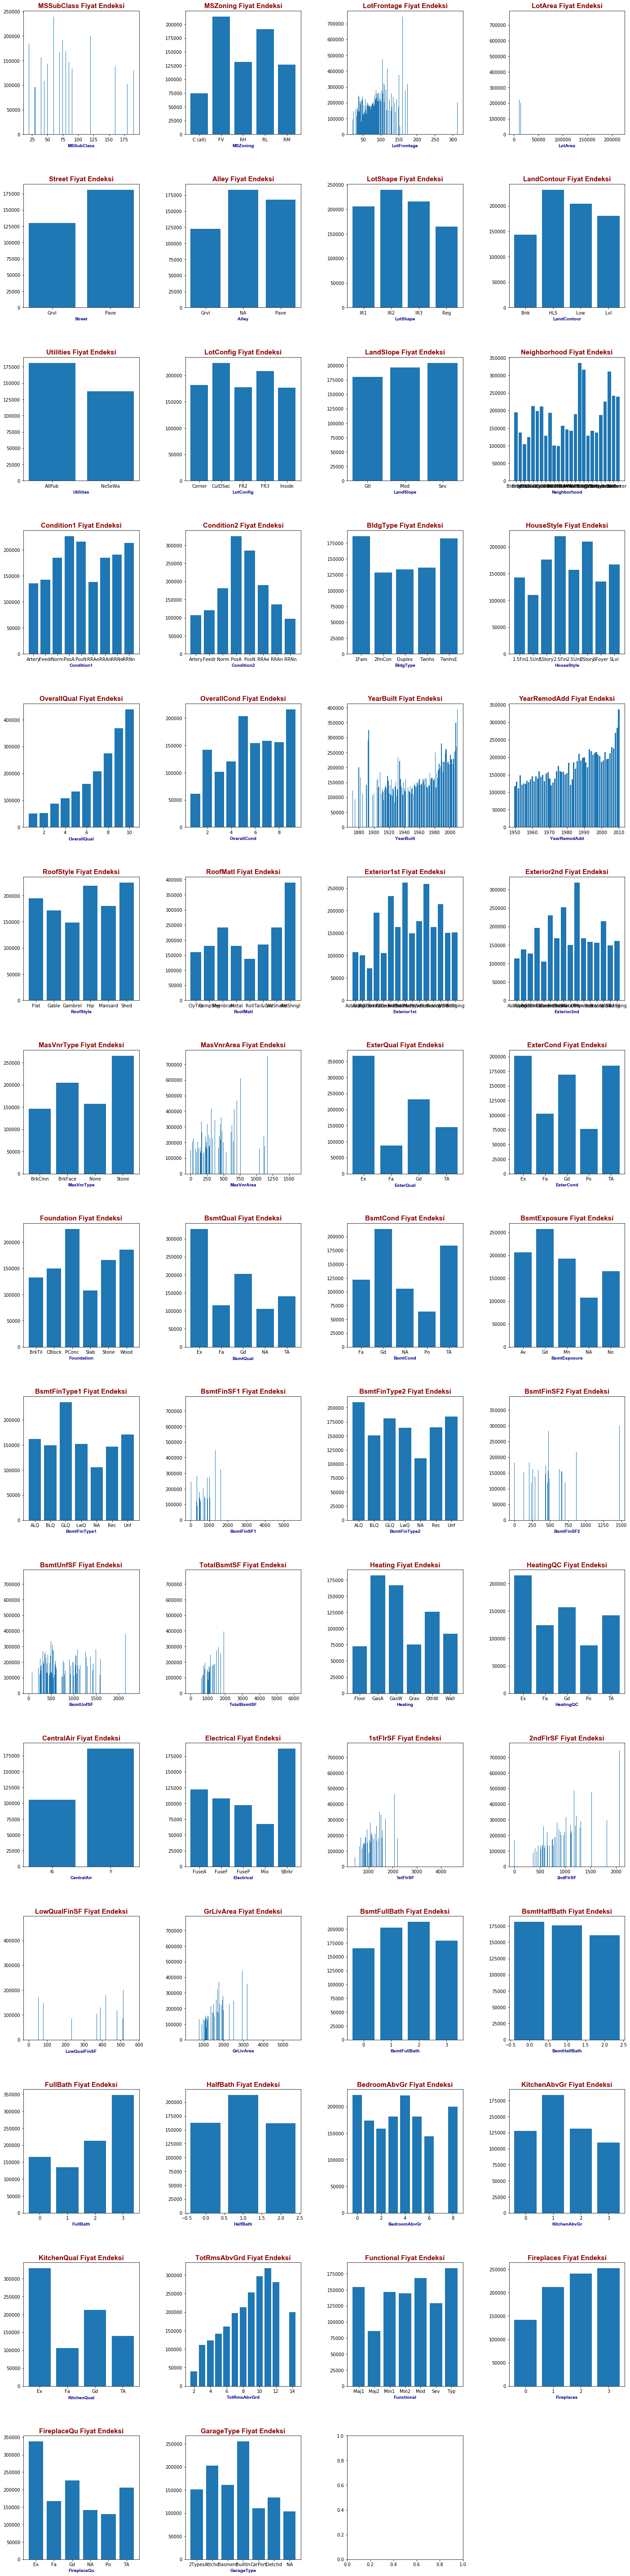

In [17]:
col_names = ev_fiyat.columns.tolist()
col_names.remove('Id')
col_names.remove('SalePrice')

#plt.figure(figsize=(24,140))
fig = plt.figure(figsize=(24,140))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for m, i in enumerate(col_names, start=1):
    #plt.subplot(20,4,m)
    plt.subplot(20, 4, m)
    plt.bar(ev_fiyat.groupby(i)["SalePrice"].mean().index, ev_fiyat.groupby(i)["SalePrice"].mean())
    plt.title(i+" Fiyat Endeksi", fontdict = baslik_font)
    #plt.ylabel("Ortalama ücret", fontdict = eksen_font)
    plt.xlabel(i, fontdict = eksen_font)

#plt.tight_layout()
plt.show()

**Regresyon Modeli:**

In [20]:
ev_fiyat_son = ev_fiyat.copy()
ev_fiyat_son.CentralAir = ev_fiyat_son.CentralAir.replace({'N':0,'Y':1})
ev_fiyat_son.Electrical = ev_fiyat_son.Electrical.replace({'Mix':1,'FuseP':2,'FuseF':3,'FuseA':4,'SBrkr':5})
ev_fiyat_son.ExterQual = ev_fiyat_son.ExterQual.replace({'Fa':1,'TA':2,'Gd':3,'Ex':4})
ev_fiyat_son.Street = ev_fiyat_son.Street.replace({'Grvl':0,'Pave':1})
#ev_fiyat_son[['CentralAir','Electrical','ExterQual','Street']]

Y = ev_fiyat_son['SalePrice']
X = ev_fiyat_son[['CentralAir','Electrical','ExterQual','Street','OverallQual', 'YearRemodAdd', 'Fireplaces','TotalBsmtSF']]

lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [-1902.05356497  1009.83529157 24042.14666732 -9146.21429469
 25104.51776538   319.95255801 20695.6351116     39.09819473]
Sabit değer (bias): 
 -712945.5828269398


In [21]:
import statsmodels.api as sm

X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     459.0
Date:                Tue, 24 Dec 2019   Prob (F-statistic):               0.00
Time:                        10:56:19   Log-Likelihood:                -17623.
No. Observations:                1460   AIC:                         3.526e+04
Df Residuals:                    1451   BIC:                         3.531e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -7.129e+05   1.37e+05     -5.218      0.000   -9.81e+05   -4.45e+05
CentralAir   -1902.0536   5077.886     -0.375      0.708   -1.19e+04    8058.728
Electrical    1009.8353   3174.664      0.318      0.750   -5217.587    7237.258
ExterQual     2.404e+04   3027.031      7.942      0.000    1.81e+04       3e+04
Street       -9146.2143   1.75e+04     -0.523      0.601   -4.35e+04    2.52e+04
OverallQual    2.51e+04   1324.282     18.957      0.000    2.25e+04    2.77e+04
YearRemodAdd   319.9526     71.757      4.459      0.000     179.193     460.712
Fireplaces     2.07e+04   1933.450     10.704      0.000    1.69e+04    2.45e+04
TotalBsmtSF     39.0982      3.090     12.652      0.000      33.036      45.160
==============================================================================
Omnibus:                      565.153   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18855.274
Skew:                           1.145   Prob(JB):                         0.00
Kurtosis:                      20.456   Cond. No.                     2.78e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
X2 = X.copy()
del X2['const']
Formül = ''

col_names = X2.columns.tolist()
for m, i in enumerate(col_names, start=0):
    #print(i)
    #print(lrm.coef_[m])
    Formül=Formül+ '('+str(lrm.coef_[m])+' * '+i+') + '

Formül='SalePrice = '+str(lrm.intercept_)+' + '+Formül+' + '+str(X['const'][0])
Formül

'SalePrice = -712945.5828269398 + (-1902.053564965124 * CentralAir) + (1009.8352915692526 * Electrical) + (24042.146667315254 * ExterQual) + (-9146.214294687457 * Street) + (25104.517765381588 * OverallQual) + (319.9525580122308 * YearRemodAdd) + (20695.635111604795 * Fireplaces) + (39.09819473025391 * TotalBsmtSF) +  + 1.0'